In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
period = 20

In [3]:
stock = "GOLDBEES.NS"
data = yf.download(stock,'2022-10-01','2023-05-18')

[*********************100%***********************]  1 of 1 completed


In [4]:
SMA=np.zeros(len(data))
for i in range(len(data)-period-1):
      close = data.iloc[i:i+period, data.columns.get_loc('Close')]
      SMA[i+period-1] = close.mean()
      if SMA[i]==0:
            SMA[i]=None

In [5]:

std_dev=np.zeros(len(data))
for i in range(len(data)-period-1):
      close = data.iloc[i:i+period, data.columns.get_loc('Close')]
      std_dev[i+period-1] = close.std()
      if std_dev[i]==0:
            std_dev[i]=None

In [6]:
mid_band = SMA
up_band = SMA + 2*std_dev
low_band = SMA - 2*std_dev

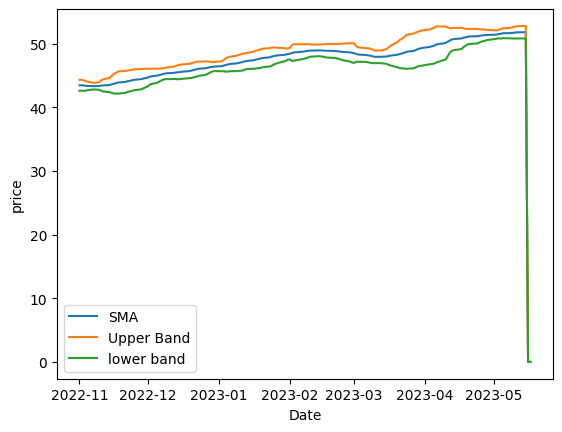

In [7]:
plt.plot(data.index,mid_band,label='SMA')
plt.plot(data.index,up_band,label='Upper Band')
plt.plot(data.index,low_band,label='lower band')
plt.xlabel('Date')
plt.ylabel('price')
plt.legend()
plt.show()